In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

symbol = "^GSPC"
start_date = datetime.datetime(2005,1,1)
end_date = datetime.datetime(2005,12,31)
df = data.DataReader(symbol, "yahoo", start_date, end_date)
df.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,1213.550049,1217.329956,1211.650024,1211.920044,1211.920044,786900000


In [2]:
df = df.drop('Adj Close', axis=1)
df.head(1)

,Open,High,Low,Close,Volume
Date,,,,,
2004-12-31,1213.550049,1217.329956,1211.650024,1211.920044,786900000


In [3]:
df['SMA14'] = df['Close'].rolling(window=14,min_periods=1).mean()
#df['SMA30'] = df['Close'].rolling(window=30,min_periods=1).mean()
#df['EMA14'] = df['Close'].ewm(span=14,min_periods=1).mean()
#df['EMA30'] = df['Close'].ewm(span=30,min_periods=1).mean()

In [4]:
diff = np.ediff1d(df[['Close']])
price_diff = np.append(diff,[0], axis=0)
price_close = df['Close']
df['Y'] = np.add(price_close, price_diff)

In [5]:
df.head()

,Open,High,Low,Close,Volume,SMA14,Y
Date,,,,,,,
2004-12-31,1213.550049,1217.329956,1211.650024,1211.920044,786900000,1211.920044,1202.079956
2005-01-03,1211.920044,1217.800049,1200.319946,1202.079956,1510800000,1207.000000,1188.050049
2005-01-04,1202.079956,1205.839966,1185.390015,1188.050049,1721000000,1200.683350,1183.739990
2005-01-05,1188.050049,1192.729980,1183.719971,1183.739990,1738900000,1196.447510,1187.890015
2005-01-06,1183.739990,1191.630005,1183.270020,1187.890015,1569100000,1194.736011,1186.189941


In [6]:
n_train = (df['Y'].count()*0.7).astype(int)

X = df[['Open', 'High', 'Low', 'Close', 'Volume','SMA14']]
y = df['Y']

X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:] 

pipe = Pipeline([("scaler", MinMaxScaler()),("mlp",MLPRegressor(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]))])

In [7]:
param_grid = {'mlp__activation':['tanh', 'relu', 'logistic'],
             'mlp__alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Beste Genauigkeit nach Kreuzvalidierung: {:.2f}".format(grid.best_score_))
print("Bester Score auf den Testdaten: {:.2f}".format(grid.score(X_test, y_test)))
print("Beste Parameter: {}".format(grid.best_params_))

Beste Genauigkeit nach Kreuzvalidierung: 0.69
Bester Score auf den Testdaten: 0.93
Beste Parameter: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001}


In [8]:
y_predict = grid.predict(X)

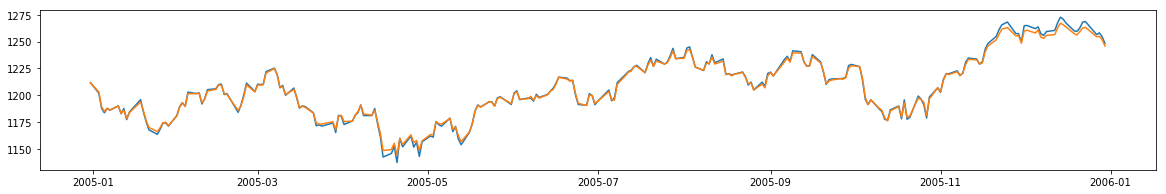

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(311)
plt.plot(df.index, df['Close'] , label="close")
plt.plot(df.index, y_predict , label="close")